### Supervised Learning Analysis: Probability sweep


#### Probability sweep 
After 30 rounds of supervised training using 500 reads of native yeast rRNA. This notebook looks only at the accuracy and movement of distributions given variable probability thresholds.


In [19]:
from multiple_model_accuracy import MultipleModelAccuracy
import numpy as np
import pandas as pd
from py3helpers.utils import list_dir
import os
import matplotlib.pyplot as plt 
from collections import defaultdict

hfhd = [27, 119, 540, 577, 618, 758, 765, 795, 973, 1006, 1289, 1427, 1772, 775, 897, 907, 1041, 1123, 1436, 1887, 2141, 2219, 2287, 2313, 2814, 2842, 2879, 2958, 2974]


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
mma = MultipleModelAccuracy(reference, positions, mods_csv)


In [31]:

acc_csv_1 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.1_em_iterations_30/testing_accuracy_csvs"
acc_csv_25 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/testing_accuracy_csvs"
acc_csv_5 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/testing_accuracy_csvs"
acc_csv_75 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.75_em_iterations_30/testing_accuracy_csvs"
acc_csv_9 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.9_em_iterations_30/testing_accuracy_csvs"



In [32]:
#unfiltered  0.25 or 0.5 are the best thresholds
acc_csv_1_data = [mma.preprocess_accuracy_csv(x) for x in list_dir(acc_csv_1, "csv")]
acc_csv_25_data = [mma.preprocess_accuracy_csv(x) for x in list_dir(acc_csv_25, "csv")]
acc_csv_5_data = [mma.preprocess_accuracy_csv(x) for x in list_dir(acc_csv_5, "csv")]
acc_csv_75_data = [mma.preprocess_accuracy_csv(x) for x in list_dir(acc_csv_75, "csv")]
acc_csv_9_data = [mma.preprocess_accuracy_csv(x) for x in list_dir(acc_csv_9, "csv")]

deltas = defaultdict(list)
for i in range(len(acc_csv_1_data)):   
    deltas["1-25"].append(acc_csv_1_data[i].accuracy - acc_csv_25_data[i].accuracy)
    deltas["1-5"].append(acc_csv_1_data[i].accuracy - acc_csv_5_data[i].accuracy)
    deltas["1-75"].append(acc_csv_1_data[i].accuracy - acc_csv_75_data[i].accuracy)
    deltas["1-9"].append(acc_csv_1_data[i].accuracy - acc_csv_9_data[i].accuracy)
    deltas["25-5"].append(acc_csv_25_data[i].accuracy - acc_csv_5_data[i].accuracy)
    deltas["25-75"].append(acc_csv_25_data[i].accuracy - acc_csv_75_data[i].accuracy)
    deltas["25-9"].append(acc_csv_25_data[i].accuracy - acc_csv_9_data[i].accuracy)
    deltas["5-75"].append(acc_csv_5_data[i].accuracy - acc_csv_75_data[i].accuracy)
    deltas["5-9"].append(acc_csv_5_data[i].accuracy - acc_csv_9_data[i].accuracy)
    deltas["75-9"].append(acc_csv_75_data[i].accuracy - acc_csv_9_data[i].accuracy)
round_n = 29
for key, list_o_diffs in deltas.items():
    print(key, np.sum(list_o_diffs[round_n]))
    print(np.sum([1 for x in list_o_diffs[round_n] if x < 0])/len(list_o_diffs[round_n]) )

1-25 -0.23660000000000014
0.5181818181818182
1-5 -0.4270000000000005
0.5
1-75 0.1160000000000001
0.45454545454545453
1-9 0.7303999999999995
0.44545454545454544
25-5 -0.19040000000000024
0.4636363636363636
25-75 0.35260000000000025
0.41818181818181815
25-9 0.9669999999999997
0.42727272727272725
5-75 0.5430000000000005
0.37272727272727274
5-9 1.1574
0.38181818181818183
75-9 0.6143999999999995
0.43636363636363634


<IPython.core.display.Javascript object>


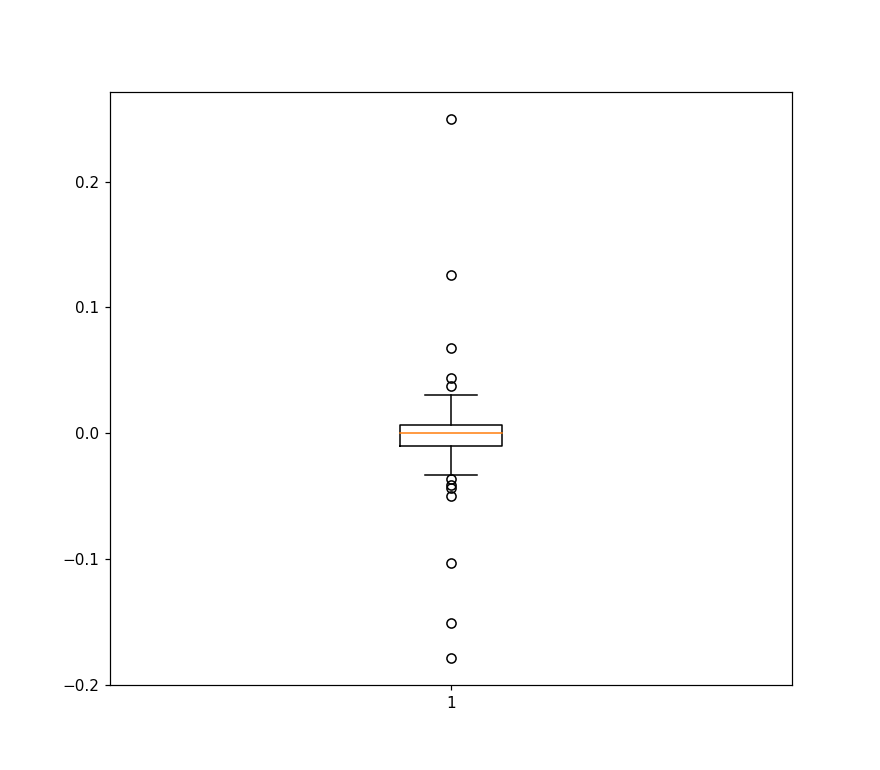

In [33]:
%matplotlib notebook
i = 29
acc_csv_25_data[i]["testing_diff"] = acc_csv_25_data[i].accuracy - acc_csv_5_data[i].accuracy


fig = plt.figure(figsize =(8, 7)) 
  
# Creating plot 
plt.boxplot(acc_csv_25_data[i]["testing_diff"]) 
  
# show plot 
plt.show() 


In [5]:
diff = 0.05
acc_csv_25_data[i][np.abs(acc_csv_25_data[i]["testing_diff"]) > diff]

,contig,reference_index,strand,variants,accuracy,precision,negative_predictive_value,recall,specificity,positive_likelihood_ratio,negative_likelihood_ratio,diagnostic_odds_ratio,f1_score,prevalence,aucroc,avg_precision,brier_score,delta1,delta2,delta,in_2prime,in_pseudo,in_unknown,percent,testing_diff
20,RDN18-1,1006,+,Cb,0.7746,0.9719,0.6921,0.5688,0.9833,34.1273,0.0293,1164.6733,0.7176,0.5036,0.8501,0.8511,0.2087,119.0,8.0,8.0,False,False,False,95,-0.1789
40,RDN25-1,662,+,Cb,0.7096,0.6788,0.7551,0.8037,0.6141,2.0827,0.4802,4.3375,0.7360,0.5036,0.8108,0.8441,0.2109,113.0,13.0,13.0,False,False,False,74,-0.1030
72,RDN25-1,2259,+,Tl,0.7385,0.6662,0.9569,0.9790,0.4868,1.9079,0.5241,3.6399,0.7929,0.5113,0.9279,0.9022,0.1997,4.0,2.0,2.0,False,False,False,95,0.1254
78,RDN25-1,2287,+,Gc,0.7167,0.7415,0.6945,0.6855,0.7495,2.7361,0.3655,7.4864,0.7124,0.5118,0.7762,0.7803,0.2281,26.0,7.0,7.0,False,False,False,95,0.0676
86,RDN25-1,2416,+,Td,0.8871,0.8451,0.9442,0.9537,0.8176,5.2280,0.1913,27.3323,0.8961,0.5108,0.9321,0.9130,0.1199,4.0,1.0,1.0,False,True,True,100,0.2495
87,RDN25-1,2420,+,Td,0.7796,0.7170,0.9058,0.9389,0.6132,2.4274,0.4120,5.8922,0.8131,0.5108,0.9000,0.8914,0.1704,198.0,4.0,4.0,False,False,False,95,-0.1505


In [29]:
#hfhd 0.25 or 0.5 are the best thresholds

acc_csv_1_data = [x[x["reference_index"].isin(hfhd)] for x in acc_csv_1_data]
acc_csv_25_data = [x[x["reference_index"].isin(hfhd)] for x in acc_csv_25_data]
acc_csv_5_data = [x[x["reference_index"].isin(hfhd)] for x in acc_csv_5_data]
acc_csv_75_data = [x[x["reference_index"].isin(hfhd)] for x in acc_csv_75_data]
acc_csv_9_data = [x[x["reference_index"].isin(hfhd)] for x in acc_csv_9_data]
deltas = defaultdict(list)
for i in range(len(acc_csv_1_data)):   
    deltas["1-25"].append(acc_csv_1_data[i].accuracy - acc_csv_25_data[i].accuracy)
    deltas["1-5"].append(acc_csv_1_data[i].accuracy - acc_csv_5_data[i].accuracy)
    deltas["1-75"].append(acc_csv_1_data[i].accuracy - acc_csv_75_data[i].accuracy)
    deltas["1-9"].append(acc_csv_1_data[i].accuracy - acc_csv_9_data[i].accuracy)
    deltas["25-5"].append(acc_csv_25_data[i].accuracy - acc_csv_5_data[i].accuracy)
    deltas["25-75"].append(acc_csv_25_data[i].accuracy - acc_csv_75_data[i].accuracy)
    deltas["25-9"].append(acc_csv_25_data[i].accuracy - acc_csv_9_data[i].accuracy)
    deltas["5-75"].append(acc_csv_5_data[i].accuracy - acc_csv_75_data[i].accuracy)
    deltas["5-9"].append(acc_csv_5_data[i].accuracy - acc_csv_9_data[i].accuracy)
    deltas["75-9"].append(acc_csv_75_data[i].accuracy - acc_csv_9_data[i].accuracy)
round_n = 29
for key, list_o_diffs in deltas.items():
    print(key, np.sum(list_o_diffs[round_n]))
    print(np.sum([1 for x in list_o_diffs[round_n] if x < 0])/len(list_o_diffs[round_n]) )

1-25 -0.1675000000000002
0.5172413793103449
1-5 -0.28000000000000025
0.5172413793103449
1-75 0.11209999999999998
0.41379310344827586
1-9 0.32289999999999985
0.3448275862068966
25-5 -0.11250000000000004
0.4827586206896552
25-75 0.2796000000000002
0.3448275862068966
25-9 0.49040000000000006
0.3103448275862069
5-75 0.3921000000000002
0.3103448275862069
5-9 0.6029000000000001
0.27586206896551724
75-9 0.21079999999999988
0.3448275862068966


<IPython.core.display.Javascript object>


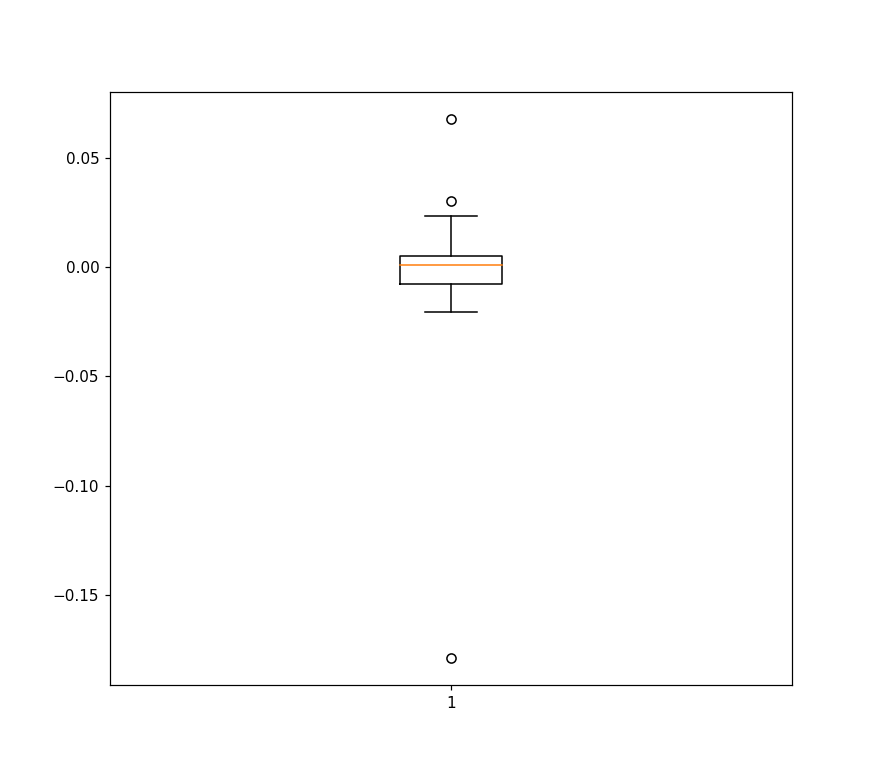

In [30]:
%matplotlib notebook
i = 29
acc_csv_25_data[i]["testing_diff"] = acc_csv_25_data[i].accuracy - acc_csv_5_data[i].accuracy


fig = plt.figure(figsize =(8, 7)) 
  
# Creating plot 
plt.boxplot(acc_csv_25_data[i]["testing_diff"]) 
  
# show plot 
plt.show() 


In [8]:
diff = 0.05
acc_csv_25_data[i][np.abs(acc_csv_25_data[i]["testing_diff"]) > diff]

,contig,reference_index,strand,variants,accuracy,precision,negative_predictive_value,recall,specificity,positive_likelihood_ratio,negative_likelihood_ratio,diagnostic_odds_ratio,f1_score,prevalence,aucroc,avg_precision,brier_score,delta1,delta2,delta,in_2prime,in_pseudo,in_unknown,percent,testing_diff
20,RDN18-1,1006,+,Cb,0.7746,0.9719,0.6921,0.5688,0.9833,34.1273,0.0293,1164.6733,0.7176,0.5036,0.8501,0.8511,0.2087,119.0,8.0,8.0,False,False,False,95,-0.1789
78,RDN25-1,2287,+,Gc,0.7167,0.7415,0.6945,0.6855,0.7495,2.7361,0.3655,7.4864,0.7124,0.5118,0.7762,0.7803,0.2281,26.0,7.0,7.0,False,False,False,95,0.0676


### 0.25 is 17.9% WORSE on 18S pos 1006

0.25 threshold 18S-1006             |  0.5 threshold 18S-1006
:-------------------------:|:-------------------------:
![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/training_distributions/RDN18-1_1006_+/1002.gif)  |  ![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_distributions/RDN18-1_1006_+/1002.gif)
![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/training_distributions/RDN18-1_1006_+/1003.gif)  |  ![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_distributions/RDN18-1_1006_+/1003.gif)
![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/training_distributions/RDN18-1_1006_+/1004.gif)  |  ![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_distributions/RDN18-1_1006_+/1004.gif)
![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/training_distributions/RDN18-1_1006_+/1005.gif)  |  ![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_distributions/RDN18-1_1006_+/1005.gif)
![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/training_distributions/RDN18-1_1006_+/1006.gif)  |  ![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_distributions/RDN18-1_1006_+/1006.gif)


## 0.25 is 6.8% BETTER on 25S pos 2287  

0.25 threshold 25S 2287             |  0.5 threshold 25S 2287
:-------------------------:|:-------------------------:
![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/training_distributions/RDN25-1_2287_+/2283.gif)  |  ![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_distributions/RDN25-1_2287_+/2283.gif)
![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/training_distributions/RDN25-1_2287_+/2284.gif)  |  ![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_distributions/RDN25-1_2287_+/2284.gif)
![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/training_distributions/RDN25-1_2287_+/2285.gif)  |  ![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_distributions/RDN25-1_2287_+/2285.gif)
![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/training_distributions/RDN25-1_2287_+/2286.gif)  |  ![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_distributions/RDN25-1_2287_+/2286.gif)
![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/training_distributions/RDN25-1_2287_+/2287.gif)  |  ![](rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_distributions/RDN25-1_2287_+/2287.gif)



## Thoughts
1. Probability threshold matters but having a static threshold is probably not advised. If the threshold is too strict, you get less movement of the kmer distributions and narrower distributions. This may be one reason why increased number of reads improves the accuracy in the 1000 vs 500 reads difference. 
2. Random chance if one side of the distribution is picked over another. It becomes especially hard if several events in a row have similar kmer distributions. These distributions get blended together into multiple, ambiguous distributions accounting for the lack of confidence and overall static levels of signal. We need to use the HDP or HDP like distributions not necessarily to correctly model final distributions (which of course is important) but to actually model the transitory and uncertain distributions when we are modelling unknown distributions. 


### TODOs
- Check if SD's play a major role in the accuracy numbers of our test dataset when comparing the 1000 vs 500 testing sets
- Create a kmer to position and position to kmer map data objects
- Create KDE distributions from emperical to use as next steps
- Increase probability threshold with stationary distributions (aka a learning rate).
- Plot Testing kmer distributions 

In [1]:
round_30_1 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.1_em_iterations_30/training_models/template_hmm30.model"
round_30_25 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/training_models/template_hmm30.model"
round_30_5 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_models/template_hmm30.model"
round_30_75 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.75_em_iterations_30/training_models/template_hmm30.model"
round_30_9 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.9_em_iterations_30/training_models/template_hmm30.model"


In [3]:
from signalalign.hiddenMarkovModel import HmmModel


In [4]:
m30_1 = HmmModel(round_30_1)

In [14]:
from py3helpers.utils import all_string_permutations
import numpy as np
import pandas as pd

In [8]:
m30_25 = HmmModel(round_30_25)
m30_5 = HmmModel(round_30_5)
m30_75 = HmmModel(round_30_75)
m30_9 = HmmModel(round_30_9)


In [17]:

t = np.array(m30_1.event_model["means"]) - np.array(m30_25.event_model["means"])
df = pd.DataFrame(data=t, index=m30_1.sorted_kmer_tuple, columns=["1-25"])
t2 = np.array(m30_1.event_model["means"]) - np.array(m30_5.event_model["means"])
df['1-5'] = t2 
t2 = np.array(m30_1.event_model["means"]) - np.array(m30_75.event_model["means"])
df['1-75'] = t2 
t2 = np.array(m30_1.event_model["means"]) - np.array(m30_9.event_model["means"])
df['1-9'] = t2 
t2 = np.array(m30_25.event_model["means"]) - np.array(m30_5.event_model["means"])
df['25-5'] = t2 
t2 = np.array(m30_25.event_model["means"]) - np.array(m30_75.event_model["means"])
df['25-75'] = t2 
t2 = np.array(m30_25.event_model["means"]) - np.array(m30_9.event_model["means"])
df['25-9'] = t2 
t2 = np.array(m30_5.event_model["means"]) - np.array(m30_75.event_model["means"])
df['5-75'] = t2 
t2 = np.array(m30_5.event_model["means"]) - np.array(m30_9.event_model["means"])
df['5-9'] = t2 
t2 = np.array(m30_75.event_model["means"]) - np.array(m30_9.event_model["means"])
df['75-9'] = t2 

df = df[(df.T != 0).any()]
df.describe()



            1-25        1-5       1-75        1-9          25-5      25-75  \
AAAAa  -0.530500  -1.304583  -5.479133  -7.980090 -7.740828e-01  -4.948633   
AAACc   0.058402   0.091730   0.285962   0.249769  3.332829e-02   0.227560   
AAAGa   0.151673   3.588302  -0.549119   5.186819  3.436628e+00  -0.700793   
AAAGc -10.593901 -15.448789 -16.052267 -16.052267 -4.854887e+00  -5.458366   
AAAaT   0.059500  -0.055187   0.047575  -0.403562 -1.146869e-01  -0.011925   
AAAfT   0.015499  -0.220637  11.075089  11.037940 -2.361365e-01  11.059589   
AAAhT  -2.837281  -2.834081  -2.837154  -2.823647  3.200000e-03   0.000127   
AAAlT   0.050104   0.065850   0.093750   0.186301  1.574632e-02   0.043646   
AACAa   0.551200   0.548900   0.600200   0.751699 -2.299987e-03   0.049000   
AACAl  -0.056004   0.130348  -0.056001   0.287556  1.863523e-01   0.000003   
AACTl  -0.403006   1.169494   5.250994   5.342294  1.572500e+00   5.654000   
AACbT   0.062660   0.063310   0.086360   0.098910  6.500000e-04 

In [24]:
df.describe()

,1-25,1-5,1-75,1-9,25-5,25-75,25-9,5-75,5-9,75-9
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,-0.711784,-0.703345,-0.592710,-0.856831,0.008439,0.119074,-0.145047,0.110635,-0.153486,-0.264121
std,5.503386,5.588550,6.439671,6.443605,2.832217,4.928574,4.418379,3.978338,3.561881,3.113352
min,-34.298169,-35.957676,-34.006195,-36.232623,-15.830495,-33.988745,-34.665459,-33.992545,-34.669259,-36.209897
25%,-0.383806,-0.499000,-0.579500,-0.632246,-0.140007,-0.231659,-0.295042,-0.098067,-0.235355,-0.133000
50%,-0.003400,-0.008500,0.001050,0.032370,0.003200,0.012150,0.017236,0.008550,0.016090,0.007042
75%,0.129751,0.182137,0.332222,0.482000,0.078839,0.237626,0.333830,0.151701,0.266724,0.116769
max,23.830138,23.818738,32.592678,23.971138,32.991133,35.096167,33.024819,35.934950,24.395900,21.028093


<IPython.core.display.Javascript object>


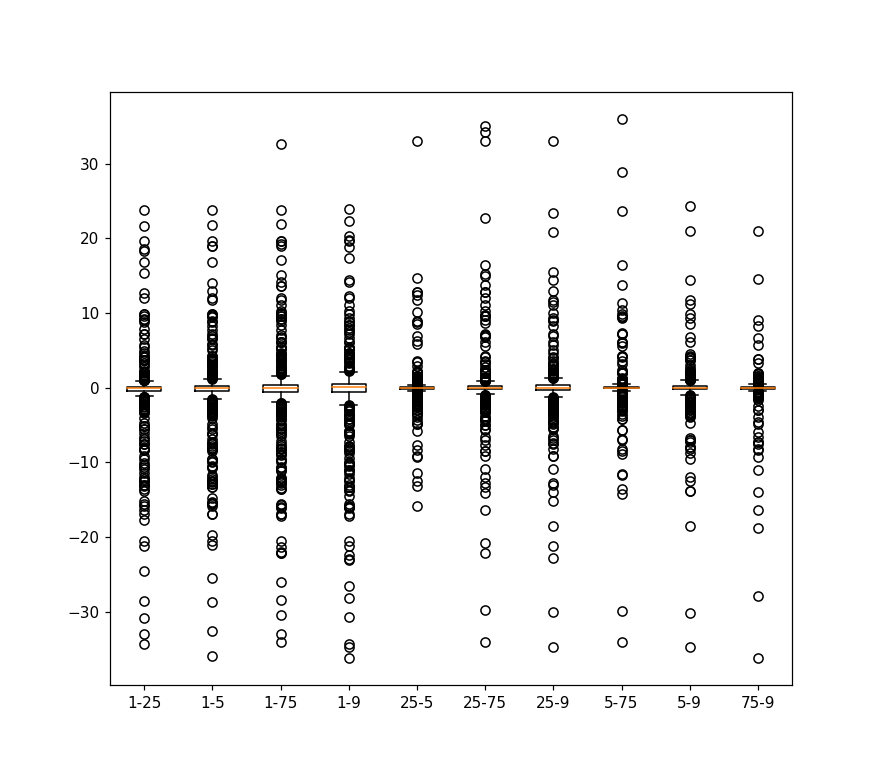

In [27]:
%matplotlib notebook

fig = plt.figure(figsize =(8, 7)) 
  
# Creating plot 
plt.boxplot(df.T) 
plt.xticks(range(1, len(df.columns)+1), df.columns)

# show plot 
plt.show() 


In [29]:
df["25-5"][np.abs(df["25-5"]) > 10]

AlCaA    32.991133
CAGdl    11.781050
CTTGi   -12.484729
CTcCT    12.839392
ClAmC   -13.201986
GTGcA    12.468444
TGbCA    12.777998
TGiCG    14.651177
dCAGd   -11.476578
lAlCa   -15.830495
lClAm    10.130340
Name: 25-5, dtype: float64

In [30]:

t = np.array(m30_1.event_model["SDs"]) - np.array(m30_25.event_model["SDs"])
df = pd.DataFrame(data=t, index=m30_1.sorted_kmer_tuple, columns=["1-25"])
t2 = np.array(m30_1.event_model["SDs"]) - np.array(m30_5.event_model["SDs"])
df['1-5'] = t2
t2 = np.array(m30_1.event_model["SDs"]) - np.array(m30_75.event_model["SDs"])
df['1-75'] = t2
t2 = np.array(m30_1.event_model["SDs"]) - np.array(m30_9.event_model["SDs"])
df['1-9'] = t2
t2 = np.array(m30_25.event_model["SDs"]) - np.array(m30_5.event_model["SDs"])
df['25-5'] = t2
t2 = np.array(m30_25.event_model["SDs"]) - np.array(m30_75.event_model["SDs"])
df['25-75'] = t2
t2 = np.array(m30_25.event_model["SDs"]) - np.array(m30_9.event_model["SDs"])
df['25-9'] = t2
t2 = np.array(m30_5.event_model["SDs"]) - np.array(m30_75.event_model["SDs"])
df['5-75'] = t2
t2 = np.array(m30_5.event_model["SDs"]) - np.array(m30_9.event_model["SDs"])
df['5-9'] = t2
t2 = np.array(m30_75.event_model["SDs"]) - np.array(m30_9.event_model["SDs"])
df['75-9'] = t2

df = df[(df.T != 0).any()]
df.describe()

,1-25,1-5,1-75,1-9,25-5,25-75,25-9,5-75,5-9,75-9
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,0.502421,0.691756,0.724965,0.689974,0.189335,0.222544,0.187552,0.033208,-0.001783,-0.034991
std,1.832508,1.814841,1.902344,2.032500,0.831283,1.168488,1.327119,1.008614,1.183925,0.779654
min,-11.892233,-9.801969,-8.614553,-8.349976,-5.268427,-6.173515,-8.776722,-6.223967,-8.914098,-5.611951
25%,0.009637,0.040475,0.047343,0.053938,0.016605,0.017949,0.003235,-0.005179,-0.040773,-0.038548
50%,0.174725,0.284363,0.291589,0.312500,0.099260,0.142151,0.154037,0.054416,0.082942,0.032775
75%,0.620006,0.843605,0.918855,0.915905,0.267169,0.375617,0.448211,0.183364,0.274181,0.136683
max,11.466722,11.780699,11.800780,12.006519,6.552750,6.894550,6.770308,6.167794,6.468085,4.919426


<IPython.core.display.Javascript object>


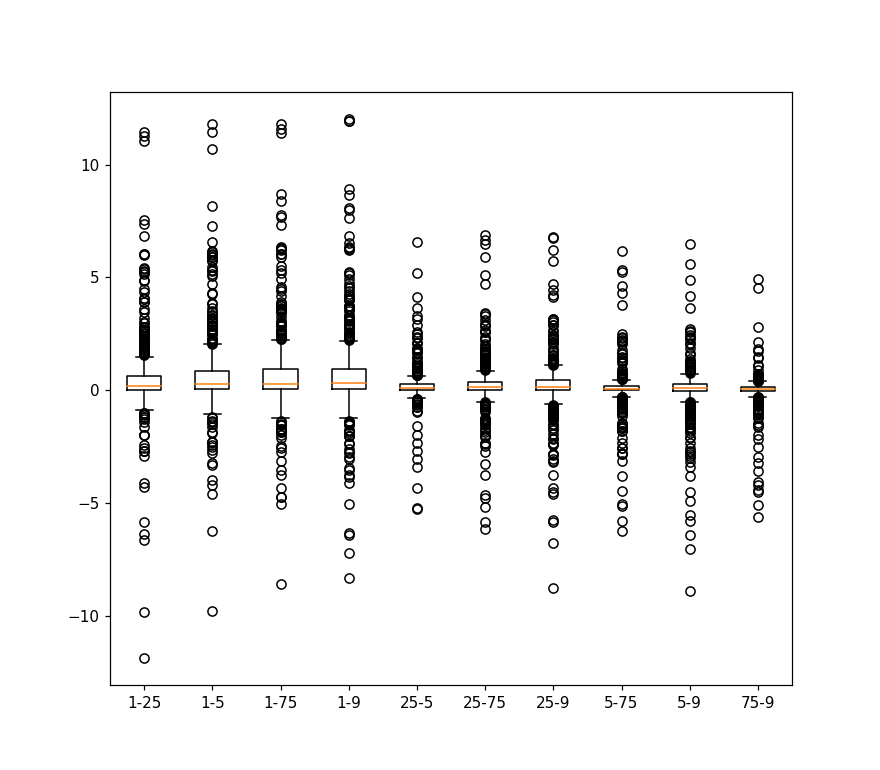

In [31]:
%matplotlib notebook

fig = plt.figure(figsize =(8, 7)) 
  
# Creating plot 
plt.boxplot(df.T) 
plt.xticks(range(1, len(df.columns)+1), df.columns)

# show plot 
plt.show() 

In [35]:
key="accuracy"
high_percent=100
low_percent=90
low_delta=7
high_delta=np.inf
max_delta=False
aot=True
avd=True
model_n = 30


<IPython.core.display.Javascript object>


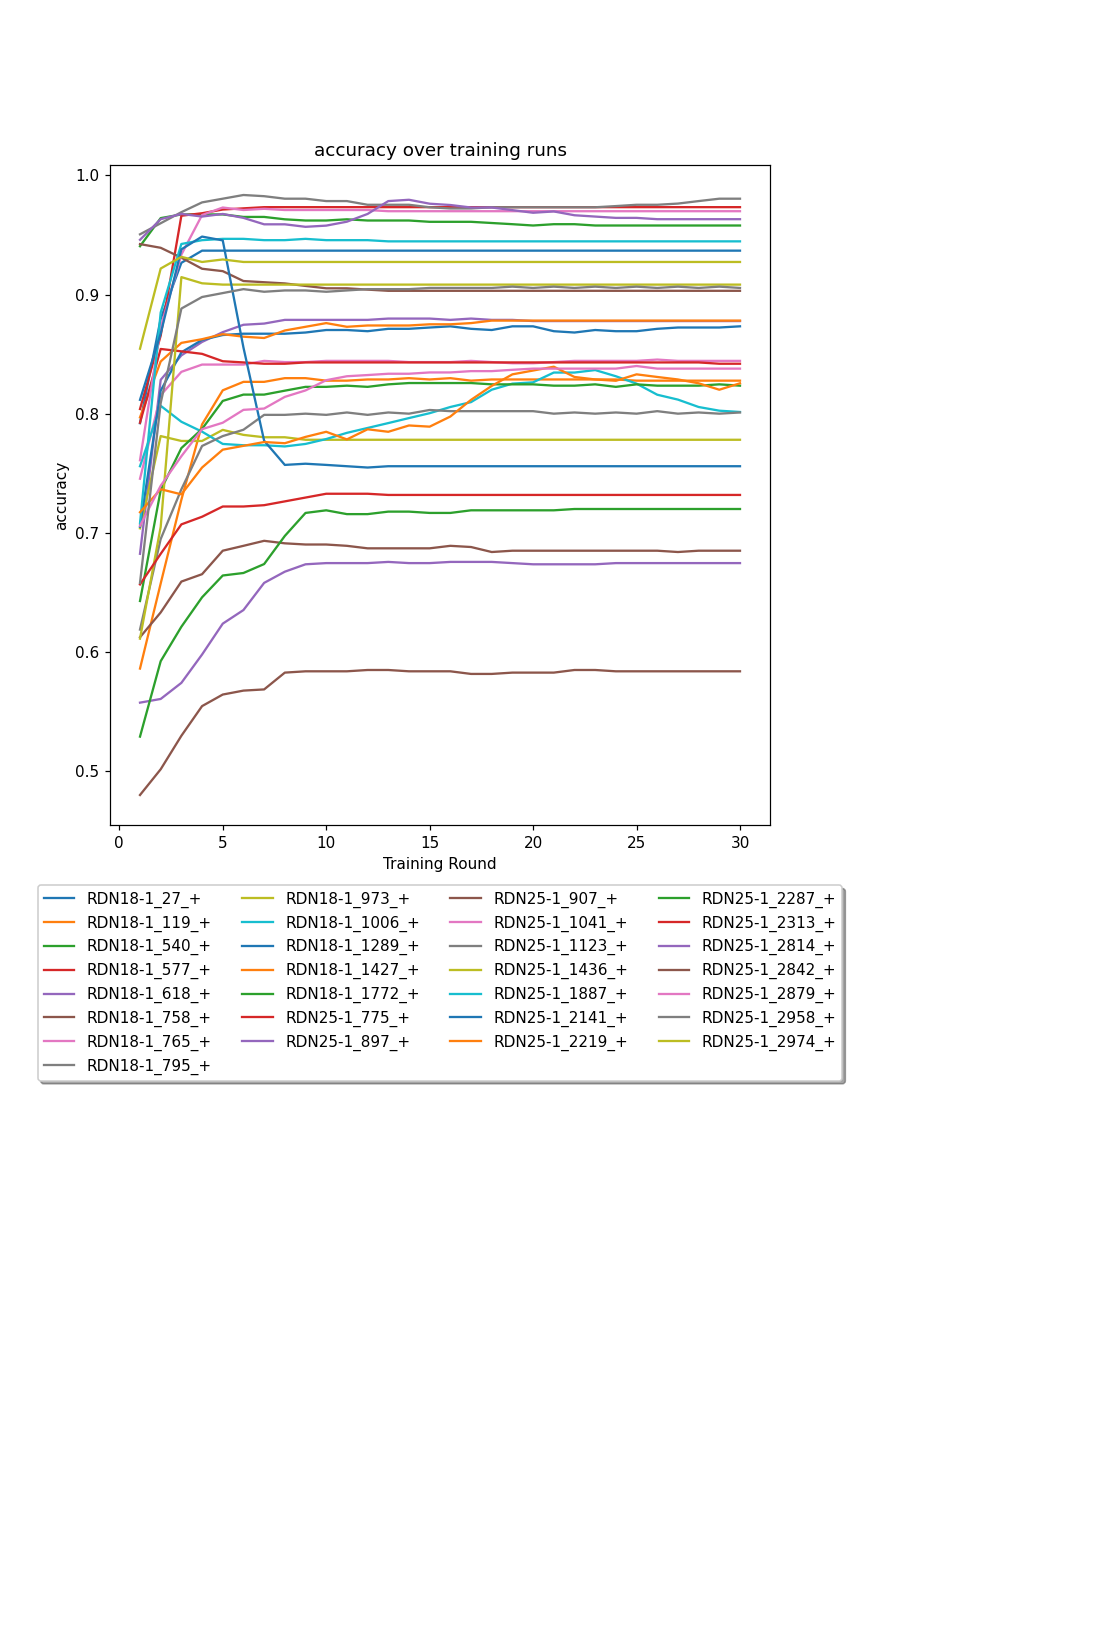

<IPython.core.display.Javascript object>


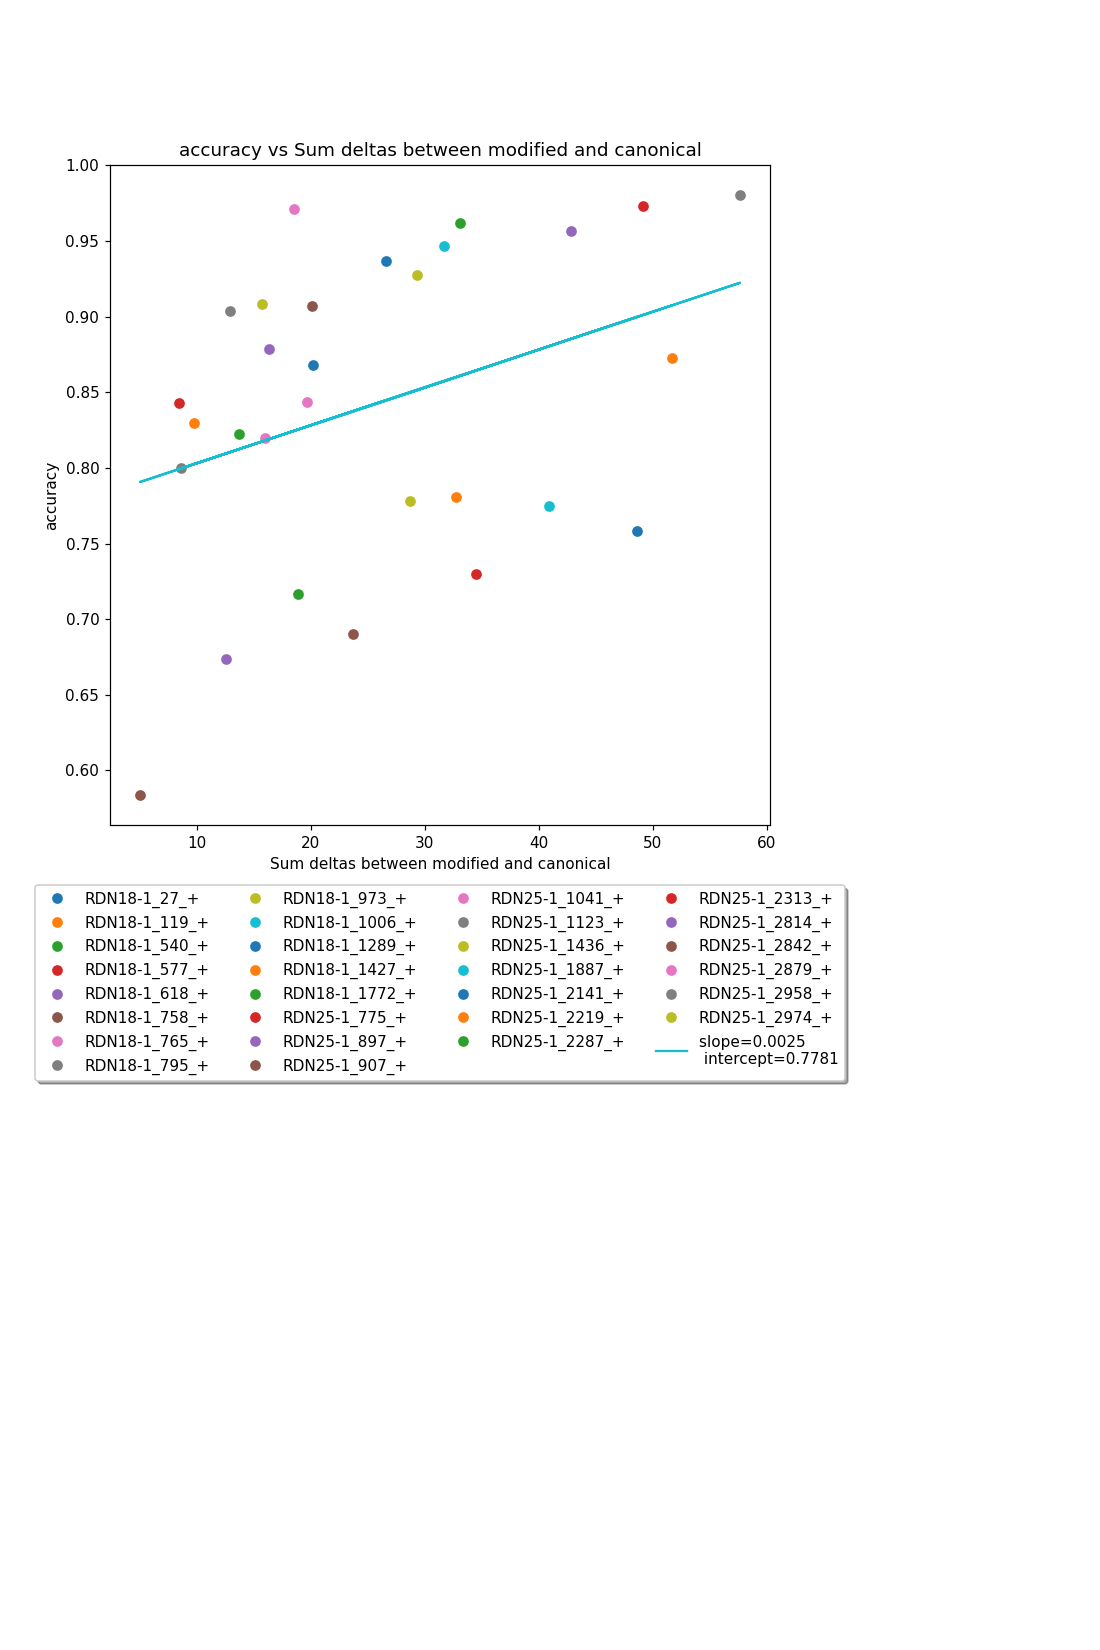

In [24]:
%matplotlib notebook

dir_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/testing_accuracy_csvs"
model_dir = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/training_models"
p, k = mma.plot_accuracy_vs_delta_and_accuracy_over_time(dir_path, 
                                                         model_dir, 
                                                         model_n, 
                                                         high_percent=high_percent, 
                                                         low_percent=low_percent, 
                                                         low_delta=low_delta, 
                                                         high_delta=high_delta, 
                                                         key=key, 
                                                         max_delta=max_delta,
                                                         aot=aot,
                                                         avd=avd)  


<IPython.core.display.Javascript object>


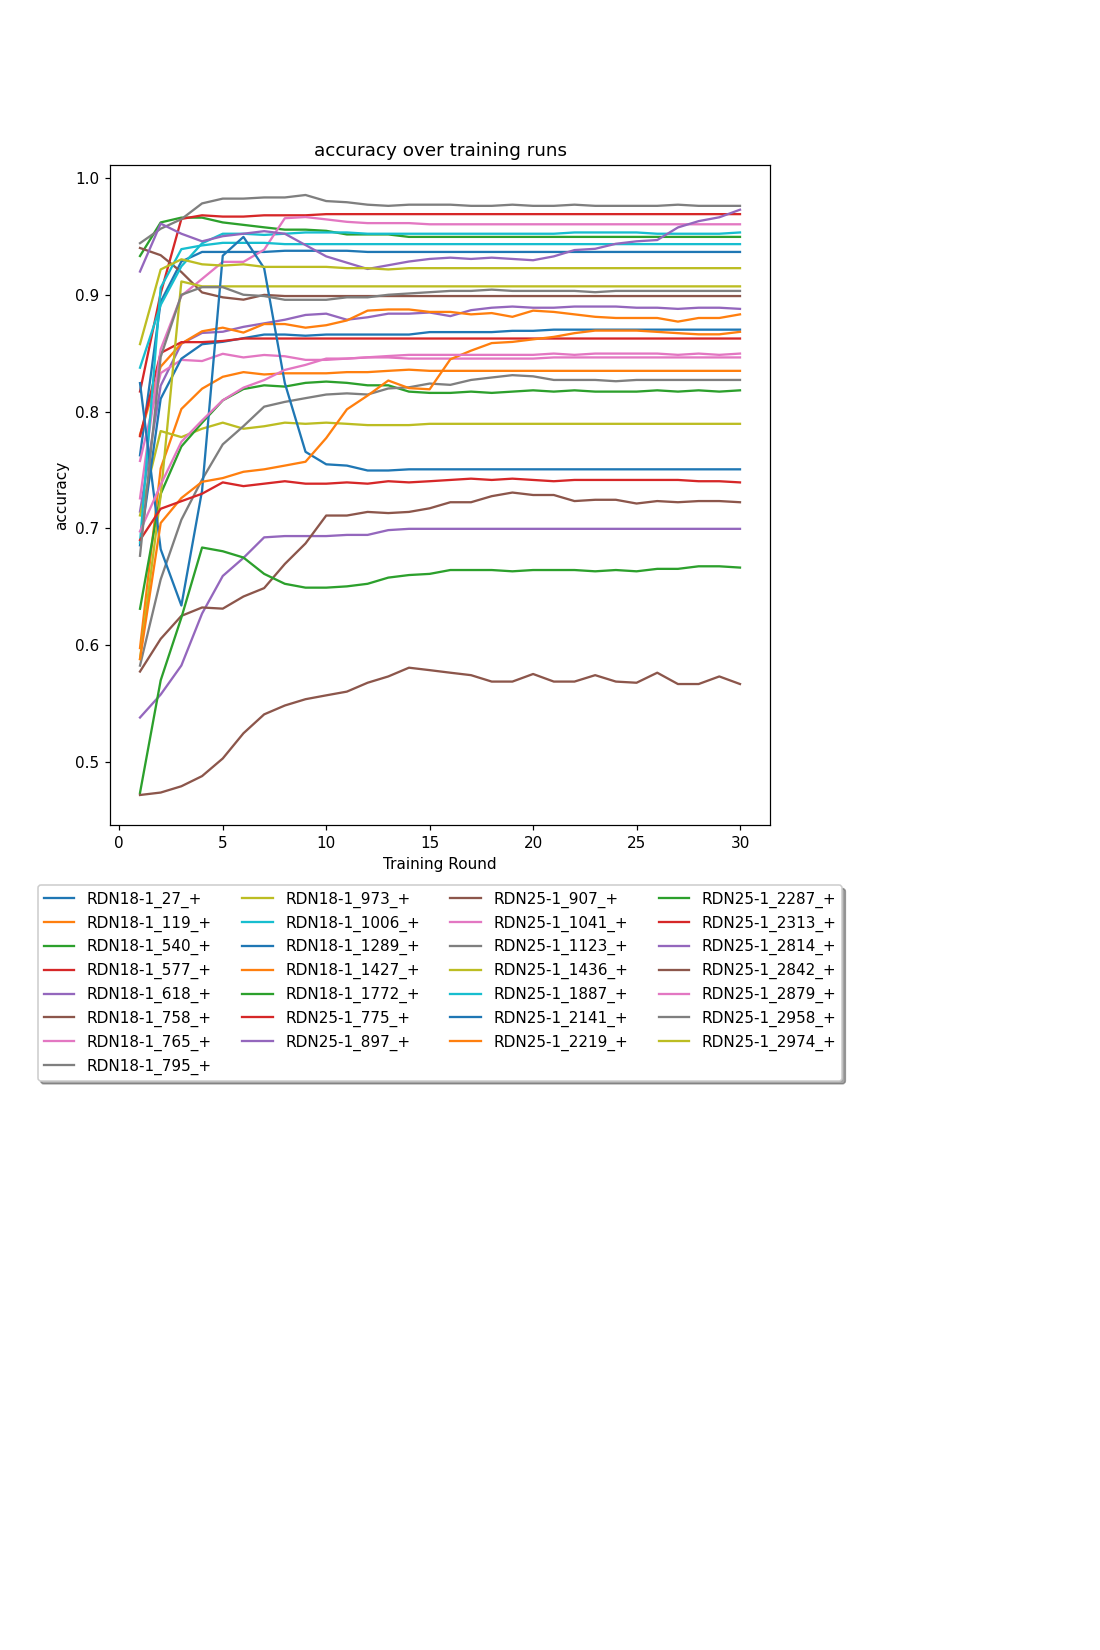

<IPython.core.display.Javascript object>


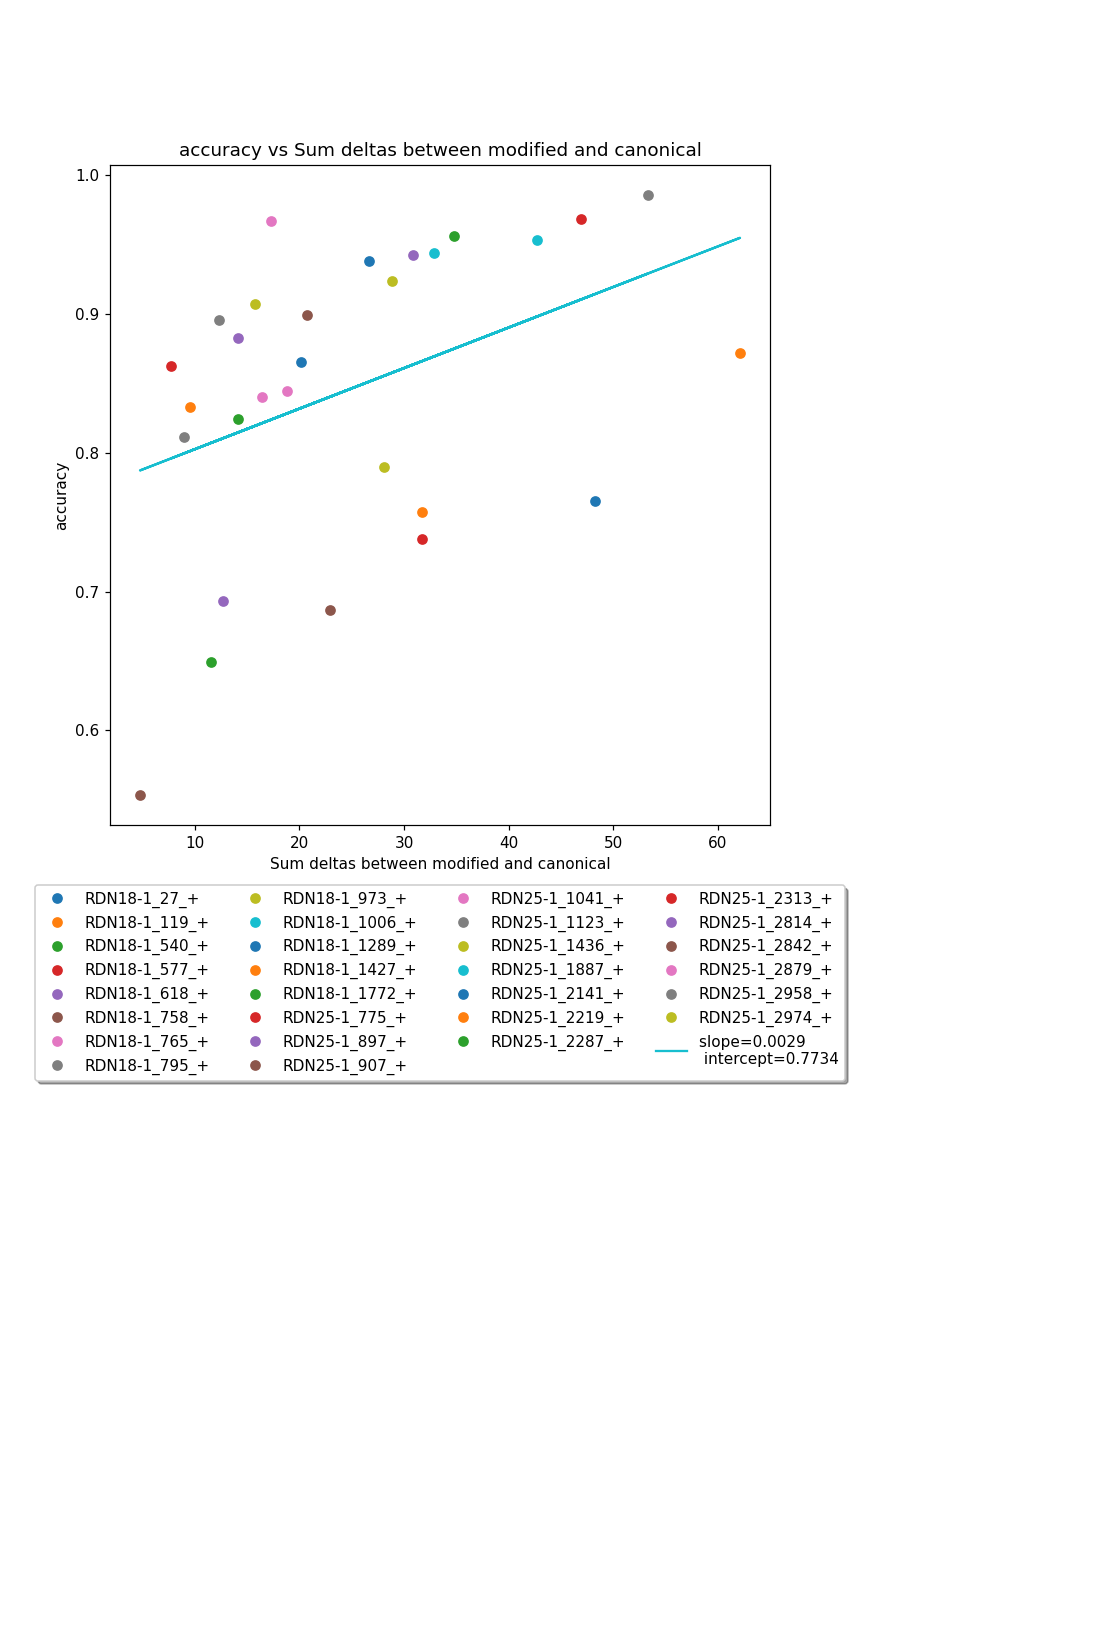

In [36]:
%matplotlib notebook

dir_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/testing_accuracy_csvs"
model_dir = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_models"
p, k = mma.plot_accuracy_vs_delta_and_accuracy_over_time(dir_path, 
                                                         model_dir, 
                                                         model_n, 
                                                         high_percent=high_percent, 
                                                         low_percent=low_percent, 
                                                         low_delta=low_delta, 
                                                         high_delta=high_delta, 
                                                         key=key, 
                                                         max_delta=max_delta,
                                                         aot=aot,
                                                         avd=avd)  


In [37]:
# 25S
# 2842
# 2287
# 907
# 2219
# 2313
# 2141


# 18S
# 897
# 973
# 1427

In [13]:
k


['RDN18-1_27_+',
 'RDN18-1_119_+',
 'RDN18-1_540_+',
 'RDN18-1_577_+',
 'RDN18-1_618_+',
 'RDN18-1_758_+',
 'RDN18-1_765_+',
 'RDN18-1_795_+',
 'RDN18-1_973_+',
 'RDN18-1_1006_+',
 'RDN18-1_1289_+',
 'RDN18-1_1427_+',
 'RDN18-1_1772_+',
 'RDN25-1_775_+',
 'RDN25-1_897_+',
 'RDN25-1_907_+',
 'RDN25-1_1041_+',
 'RDN25-1_1123_+',
 'RDN25-1_1436_+',
 'RDN25-1_1887_+',
 'RDN25-1_2141_+',
 'RDN25-1_2219_+',
 'RDN25-1_2287_+',
 'RDN25-1_2313_+',
 'RDN25-1_2814_+',
 'RDN25-1_2842_+',
 'RDN25-1_2879_+',
 'RDN25-1_2958_+',
 'RDN25-1_2974_+']